## Prediction of Traffic Signs


## Prediction of Traffic Signs


In [3]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import warnings

warnings.filterwarnings("ignore")

# Define class labels
classes = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of Speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing veh over 3.5 tons",
    11: "Right-of-way at intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Veh > 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycle crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End speed + passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep Left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing veh > 3.5 tons",
}

# Load the saved model
model = load_model("model_traffic_data.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted Class ID: 8
Predicted Class: Speed limit (120km/h)


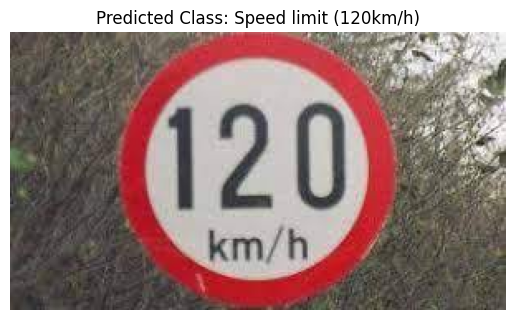

In [ ]:
# Path to the image
my_path = (
    r"E:\AIE_Expert_Internship\traffic_sign_detection\Test_Images\traffic_120Km.jpeg"
)

# Load and preprocess the image
img = cv2.imread(my_path)
if img is None:
    print(f"Error loading image at {my_path}")
else:
    # Resize the image to the input size expected by the model (30x30 or 33x33, as per your model)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (33, 33))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize to match the input size
    img = cv2.resize(img, (33, 33))

    # Normalize the image
    img = img / 255.0

    # Add the extra dimension for the channels (now it becomes (33, 33, 1))
    img = np.expand_dims(img, axis=-1)

    # Add batch dimension (shape becomes (1, 33, 33, 1))
    img = np.expand_dims(img, axis=0)

    # Make the prediction
    pred = model.predict(img)

    # Get the class with the highest probability
    predicted_class = np.argmax(pred, axis=1)

    # Display the image and the prediction
    plt.imshow(cv2.cvtColor(cv2.imread(my_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Class: {classes[predicted_class[0]]}")
    plt.axis("off")
    plt.show
    print(f"Predicted Class ID: {predicted_class[0]}")
    print(f"Predicted Class: {classes[predicted_class[0]]}")